## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://github.com/CarolWuuu/DS3001_kmc.git

Cloning into 'DS3001_kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.


In [2]:
import pandas as pd
import numpy as np

In [31]:
airbnb = pd.read_csv('/content/DS3001_kmc/data/airbnb_hw.csv')

In [32]:
df1 = airbnb.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
print(df1.describe())
#missing price because it's not numeric
print(df1.isnull().sum())

               Beds  Number Of Reviews  Review Scores Rating
count  30393.000000       30478.000000          22155.000000
mean       1.530089          12.018735             91.993230
std        1.015359          21.980703              8.850373
min        0.000000           0.000000             20.000000
25%        1.000000           0.000000             89.000000
50%        1.000000           3.000000             94.000000
75%        2.000000          13.000000            100.000000
max       16.000000         257.000000            100.000000
Price                      0
Beds                      85
Number Of Reviews          0
Review Scores Rating    8323
dtype: int64


In [33]:
#clean price
df1['Price'].value_counts()
df1['Price']=df1['Price'].str.replace(',','')
df1['Price']=pd.to_numeric(df1['Price'])
df1['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [34]:
#clean beds
df1['Beds']=df1['Beds'].fillna(1)

In [35]:
#clean review score
pd.crosstab(df1['Review Scores Rating'].isnull(),df1['Number Of Reviews']>0)


Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


509 true missing review score (no reviews), and 7814 that has reviews but no review score. For this exercise drop all missing value because we don't want to impute values and skew the clustering.

In [37]:
df1.dropna(how='any', inplace=True)
df1.isnull().sum()

Price                   0
Beds                    0
Number Of Reviews       0
Review Scores Rating    0
dtype: int64

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).


In [38]:
def maxmin(var):
  new_var = (var-min(var))/(max(var)-min(var))
  return new_var

df1_noPrice = df1.drop('Price',axis=1)
df1_noPrice = df1_noPrice.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#create a model
model = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0)
#fit the model to df
model = model.fit(df1_noPrice)
#create cluster column
df1_noPrice['Cluster']=model.labels_

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

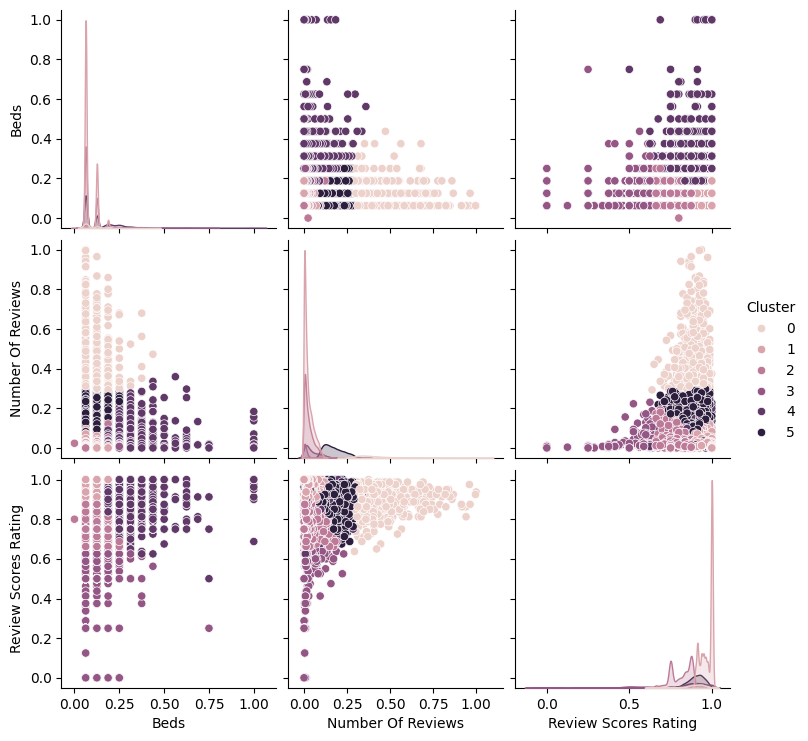

In [44]:
import seaborn as sns
sns.pairplot(data=df1_noPrice,hue='Cluster')



5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [46]:
df1['Cluster']=model.labels_
df1.loc[:,['Price','Cluster']].groupby('Cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
Cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Cluster 4 has the highest average price, and are more expensive across distribution. Outliers in other clusters doesn't give the full picture. Therefore cluster 4 has the highest rental prices.


6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

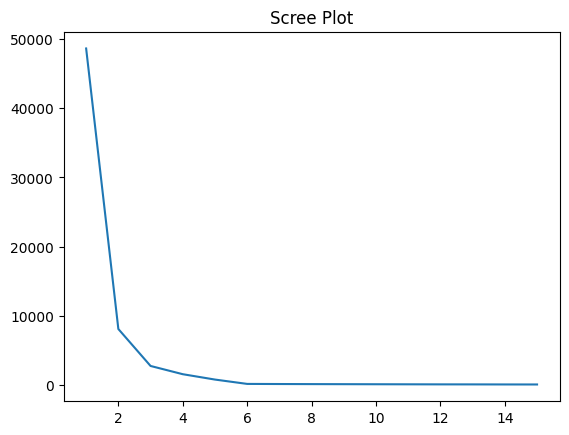

In [47]:
k_max = 15
k_grid = np.arange(1,k_max+1) # The range of k's to consider
SSE = np.zeros(k_max) # We'll store the training error here
for k in range(k_max): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df1_noPrice) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

k of 2 or 3 seems good

Price                                                            
           count        mean         std   min   25%    50%     75%      max
Cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

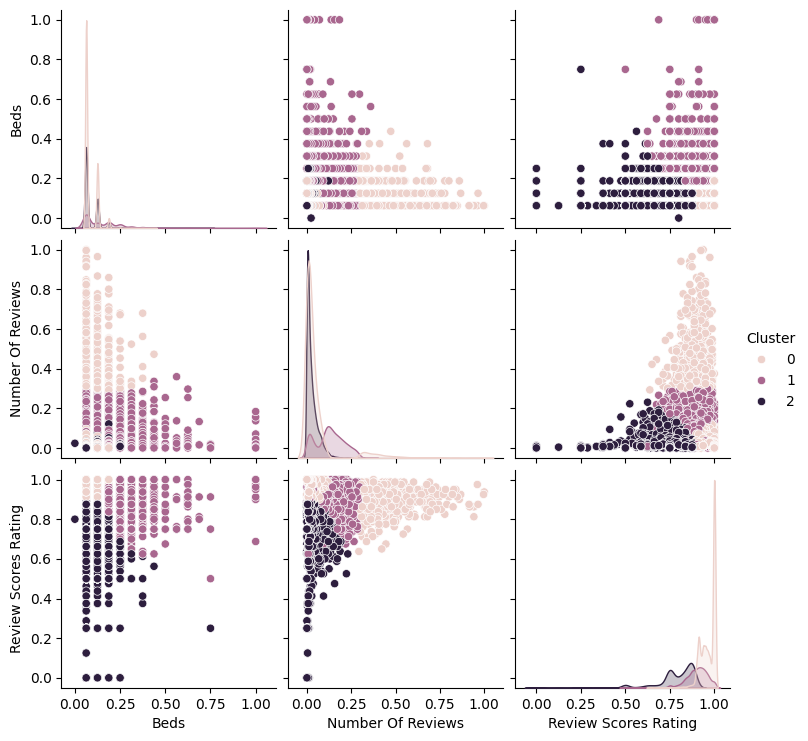

In [48]:
#create a model
model = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
#fit the model to df
model = model.fit(df1_noPrice)
#create cluster column
df1_noPrice['Cluster']=model.labels_

sns.pairplot(data=df1_noPrice,hue='Cluster')
df1['Cluster']=model.labels_
df1.loc[:,['Price','Cluster']].groupby('Cluster').describe()

cluster 0 has high number of reviews and the review scores are high on average.



**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [49]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

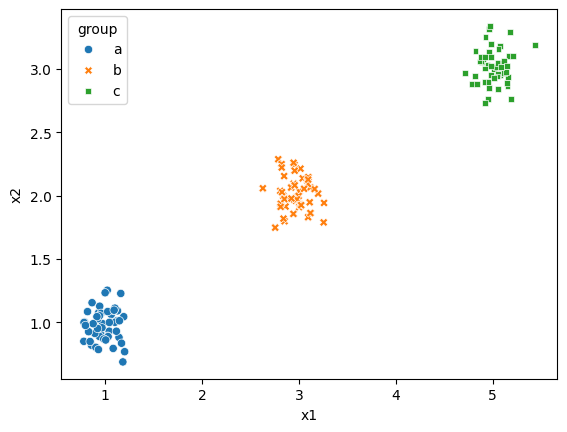

In [50]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

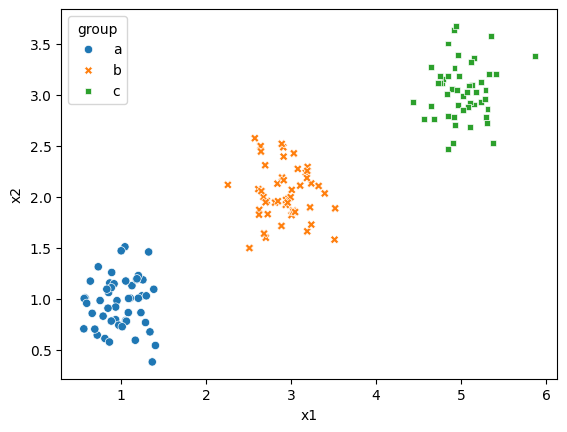

In [51]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

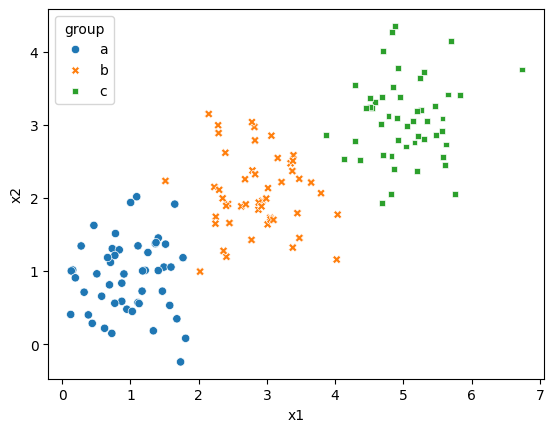

In [52]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

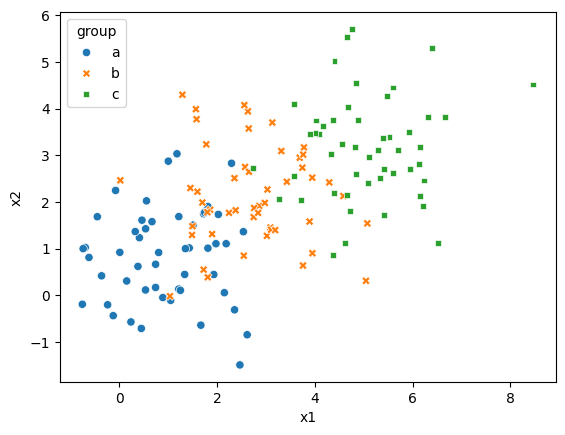

In [53]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

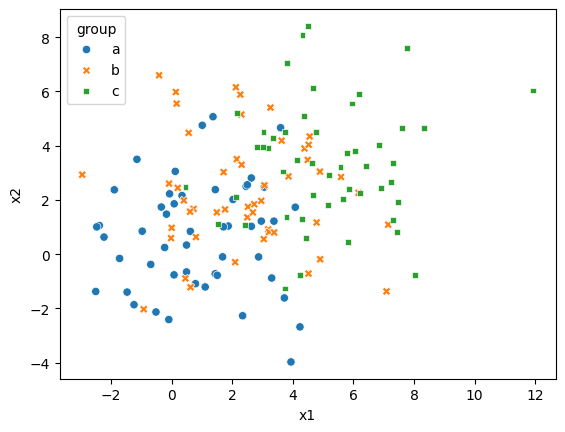

In [54]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise increases, the clusters become less centered by group and cross path with each other


3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.


In [58]:
def screen(X):
  #preprocess data
  Z=X.loc[:,['x1','x2']]
  Z=Z.apply(maxmin)
  #create screent plot
  k_max = 15
  k_grid = np.arange(1,k_max+1) # The range of k's to consider
  SSE = np.zeros(k_max) # We'll store the training error here
  for k in range(k_max): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(Z) # Fit the emodel
      SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

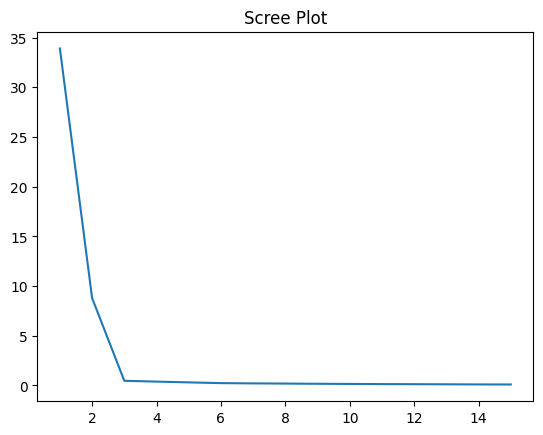

In [59]:
screen(df0_125)

elbow at 3

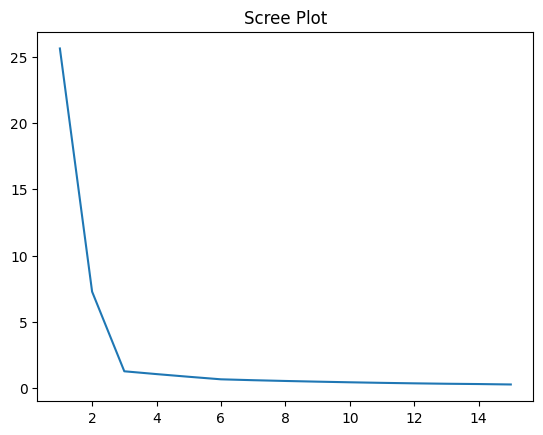

In [60]:
screen(df0_25)

elbow at 3

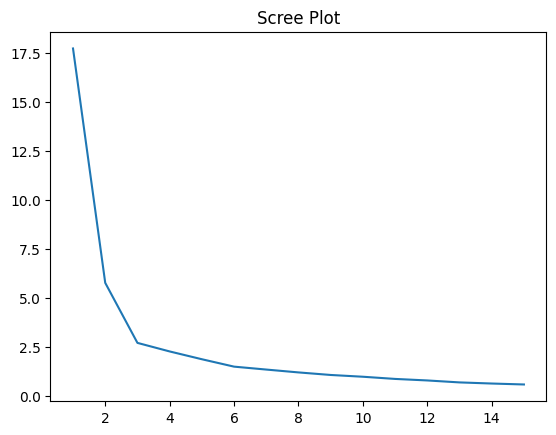

In [61]:
screen(df0_5)

elbow at 3

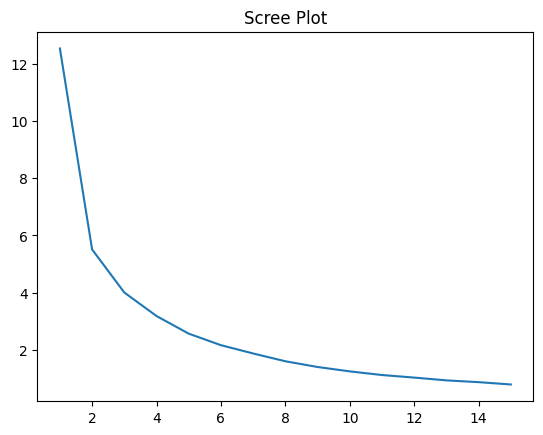

In [62]:
screen(df1_0)

less obvious elbow at 3, close to 2

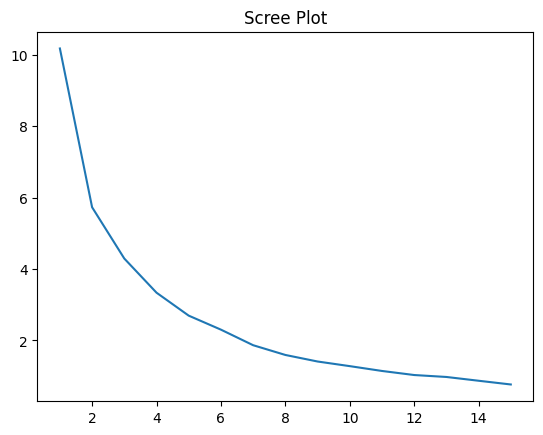

In [63]:
screen(df2_0)

position of elbow less obvious

4. Explain the intuition of the elbow, using this numerical simulation as an example.

If the groups are separate and distinct,the marginal benefit of an additional cluster is huge because we capture a big drop in SSE. As the cluster collides, the screen plot becomes smooth and the position of elbow will be less obvious.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?